In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [50]:
print(tf.__version__)

2.5.0


In [51]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
print(len(x_train))

60000


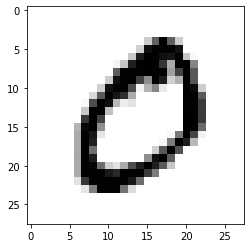

In [53]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [54]:
print(y_train[1])

0


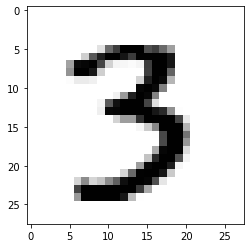

In [55]:
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()

In [56]:
print( (index+1), '번째 이미지의 숫자는 바로 ', y_train[index], '입니다.')

10001 번째 이미지의 숫자는 바로  3 입니다.


In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [58]:
print(x_train.shape)

(60000, 28, 28)


In [59]:
print(x_test.shape)

(10000, 28, 28)


In [60]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [61]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [62]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [63]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)


In [64]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

Before Reshape - x_test_norm shape: (10000, 28, 28)


In [65]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [66]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1840 - accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0618 - accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0356 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0285 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0230 - accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0164 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [67]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0363 - accuracy: 0.9897
test_loss: 0.03629692271351814 
test_accuracy: 0.9897000193595886


In [68]:
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis=1)
idx=0 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [4.7394220e-11 1.0357016e-08 4.8731064e-08 2.4311012e-07 5.2405973e-09
 9.5276035e-12 2.4293923e-15 9.9999928e-01 9.5643827e-08 3.4427103e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


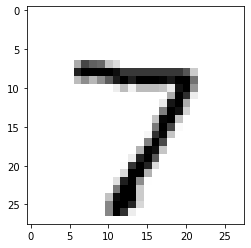

In [69]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [70]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):

    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

예측확률분포: [2.9542605e-06 1.6043598e-03 8.2191217e-01 1.4622427e-03 2.7629845e-05
 5.8596139e-10 8.3853723e-12 1.7491895e-01 7.0310918e-05 1.4003385e-06]
라벨: 7, 예측결과: 2


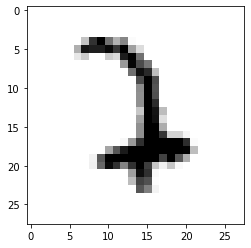

예측확률분포: [6.77705169e-01 1.08173026e-09 5.49133292e-05 5.73148835e-04
 4.61021576e-09 9.40776346e-09 1.08060054e-01 5.12959397e-10
 2.11636394e-01 1.97028881e-03]
라벨: 6, 예측결과: 0


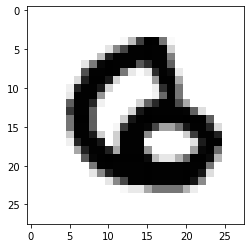

예측확률분포: [2.2730441e-03 2.4408150e-02 5.1243454e-03 1.4359488e-01 3.4707182e-04
 7.8197988e-04 4.5401757e-06 6.3910747e-01 2.2994322e-03 1.8205909e-01]
라벨: 9, 예측결과: 7


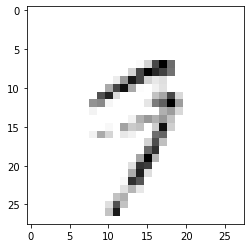

예측확률분포: [2.6186222e-02 9.6185088e-02 1.1882518e-08 1.4118135e-08 2.2034203e-03
 2.0594562e-05 1.0858580e-08 1.6758491e-01 5.5375276e-05 7.0776439e-01]
라벨: 7, 예측결과: 9


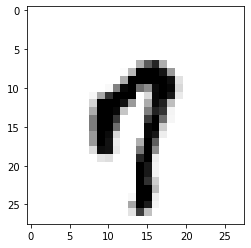

예측확률분포: [2.9542605e-06 1.6043598e-03 8.2191217e-01 1.4622427e-03 2.7629845e-05
 5.8596139e-10 8.3853723e-12 1.7491895e-01 7.0310918e-05 1.4003385e-06]
라벨: 7, 예측결과: 2


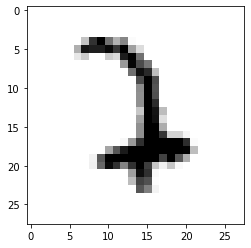

In [71]:
samples = random.choices(population=wrong_predict_list, k=5)
for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [72]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

In [73]:
model=keras.models.Sequential()

In [74]:
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                12832     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [76]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [77]:
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2322 - accuracy: 0.9302
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0797 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0597 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0397 - accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0332 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0253 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0213 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [78]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)

313/313 - 1s - loss: 0.0364 - accuracy: 0.9885


In [79]:
print("test_loss: {}".format(test_loss))

test_loss: 0.036410678178071976


In [80]:
print("test_accuracy: {}".format(test_accuracy))

test_accuracy: 0.9884999990463257


In [81]:
!pip install pillow

In [82]:
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [101]:
$ mkdir -p ~/aiffel/rock_scissor_paper/scissor
$ mkdir -p ~/aiffel/rock_scissor_paper/rock
$ mkdir -p ~/aiffel/rock_scissor_paper/paper

$ ls -l -/aiffel/rock_scissor_paper

SyntaxError: invalid syntax (<ipython-input-101-eb3cfd94a715>, line 1)

In [112]:
from PIL import Image
import os, glob
import numpy as np
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [119]:
import os
images=glob.glob("./rock_scissor_paper/scissor/*.jpg")


target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("가위 이미지 resize 완료!")

가위 이미지 resize 완료!


In [120]:
images=glob.glob("./rock_scissor_paper/rock/*.jpg")


target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("바위 이미지 resize 완료!")

바위 이미지 resize 완료!


In [121]:
images=glob.glob("./rock_scissor_paper/paper/*.jpg")


target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
print("보 이미지 resize 완료!")

보 이미지 resize 완료!


In [122]:
def load_data(img_path):
# 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300 # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3

#이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    

    idx=0
    for file in glob.iglob("./rock_scissor_paper/scissor/*.jpg"):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0 # 가위 : 0
        idx=idx+1

    for file in glob.iglob('./rock_scissor_paper/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1 # 바위 : 1
        idx=idx+1

    for file in glob.iglob('./rock_scissor_paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2 # 보 : 2
        idx=idx+1
    

    return imgs, labels
print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")

image_dir_path = "./rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0 # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_train)의 이미지 개수는 0 입니다.


In [123]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


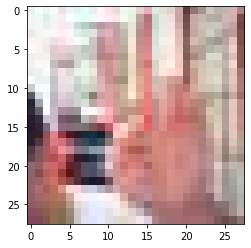

In [124]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

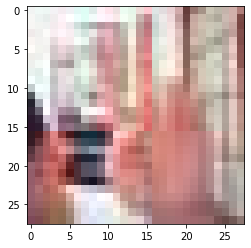

In [125]:
plt.imshow(x_train[2])

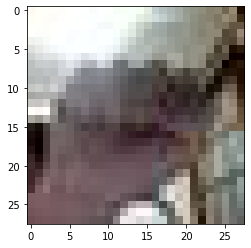

In [126]:
plt.imshow(x_train[100])

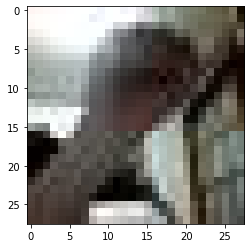

In [127]:
plt.imshow(x_train[150])

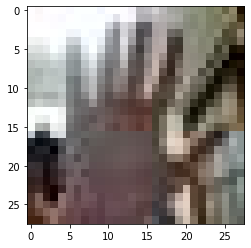

In [128]:
plt.imshow(x_train[204])